In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Avg Earnings per Week.csv", skiprows=[1])

In [3]:
df.shape

(160, 10)

In [4]:
df.head()

,Unnamed: 0,All manual employee grades,Skilled operatives,Apprentices,Unskilled and semi-skilled - adults,Unskilled and semi-skilled - juveniles,Clerical employees - female,Clerical employees - male,Foremen and supervisors,All employees (clerical and operatives)
0,1969Q1,NaN,25.24,NaN,21.34,NaN,NaN,NaN,NaN,NaN
1,1969Q2,NaN,27.59,NaN,23.41,NaN,NaN,NaN,NaN,NaN
2,1969Q3,26.0,30.77,12.63,24.71,11.44,14.01,22.33,35.4,25.56
3,1969Q4,NaN,29.48,NaN,23.20,NaN,NaN,NaN,NaN,NaN
4,1970Q1,NaN,29.97,NaN,24.19,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns.values

array(['Unnamed: 0', 'All manual employee grades', 'Skilled operatives',
       'Apprentices', 'Unskilled and semi-skilled - adults',
       'Unskilled and semi-skilled - juveniles',
       'Clerical employees - female', 'Clerical employees - male',
       'Foremen and supervisors',
       'All employees (clerical and operatives)'], dtype=object)

In [6]:
df=df.rename(columns={'Unnamed: 0': 'Year_Quarter', 'All manual employee grades':'Manual_employee_grades',
            'Skilled operatives':'Skilled_operatives','Unskilled and semi-skilled - adults':'Semi_skilled_adults',
            'Unskilled and semi-skilled - juveniles':'Semi_skilled_juveniles',
            'Clerical employees - female':'Clerical_employees_female',
            'Clerical employees - male':'Clerical_employees_male',
            'Foremen and supervisors':'Foremen_and_supervisors',
            'All employees (clerical and operatives)':'Clerical_and_Operatives'})

In [7]:
df.tail()

,Year_Quarter,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Semi_skilled_juveniles,Clerical_employees_female,Clerical_employees_male,Foremen_and_supervisors,Clerical_and_Operatives
155,2007Q4,878.93,946.67,529.94,838.42,538.07,545.94,724.50,"1,094",842.29
156,2008Q1,861.20,920.77,495.34,829.71,518.46,540.39,724.98,"1,079.12",829.22
157,2008Q2,842.95,912.50,490.82,803.92,479.55,544.70,719.01,"1,086.62",813.88
158,2008Q3,848.49,919.12,531.14,799.90,474.64,543.50,762.07,"1,102.07",820.59
159,2008Q4,855.54,913.07,535.35,796.63,425.78,540.13,760.96,"1,083.12",822.31


In [8]:
df.describe()

,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Semi_skilled_juveniles,Clerical_employees_female,Clerical_employees_male,Clerical_and_Operatives
count,121.000000,160.000000,121.000000,160.000000,121.000000,121.000000,121.000000,121.000000
mean,395.917107,363.561125,234.635537,303.834063,230.160826,249.746198,343.233306,385.084711
std,245.936523,282.171432,144.051430,237.058516,150.486269,152.944761,205.415366,237.377727
min,26.000000,25.240000,12.600000,21.340000,11.440000,14.010000,22.330000,25.560000
25%,232.650000,116.092500,141.870000,98.512500,112.570000,151.120000,208.200000,227.590000
50%,335.740000,274.440000,208.430000,237.295000,200.540000,214.510000,291.610000,326.790000
75%,607.470000,551.450000,358.710000,406.812500,368.000000,355.670000,495.610000,588.600000
max,878.930000,946.670000,535.350000,838.420000,563.840000,545.940000,762.070000,842.290000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Quarter               160 non-null    object 
 1   Manual_employee_grades     121 non-null    float64
 2   Skilled_operatives         160 non-null    float64
 3   Apprentices                121 non-null    float64
 4   Semi_skilled_adults        160 non-null    float64
 5   Semi_skilled_juveniles     121 non-null    float64
 6   Clerical_employees_female  121 non-null    float64
 7   Clerical_employees_male    121 non-null    float64
 8   Foremen_and_supervisors    121 non-null    object 
 9   Clerical_and_Operatives    121 non-null    float64
dtypes: float64(8), object(2)
memory usage: 12.6+ KB


In [10]:
df['Year and Quarter'] =df['Year_Quarter'].str.replace(r'(\w{4})',r'\1-',regex=True).str.strip('\-')

In [11]:
df.head()

,Year_Quarter,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Semi_skilled_juveniles,Clerical_employees_female,Clerical_employees_male,Foremen_and_supervisors,Clerical_and_Operatives,Year and Quarter
0,1969Q1,NaN,25.24,NaN,21.34,NaN,NaN,NaN,NaN,NaN,1969-Q1
1,1969Q2,NaN,27.59,NaN,23.41,NaN,NaN,NaN,NaN,NaN,1969-Q2
2,1969Q3,26.0,30.77,12.63,24.71,11.44,14.01,22.33,35.4,25.56,1969-Q3
3,1969Q4,NaN,29.48,NaN,23.20,NaN,NaN,NaN,NaN,NaN,1969-Q4
4,1970Q1,NaN,29.97,NaN,24.19,NaN,NaN,NaN,NaN,NaN,1970-Q1


In [13]:
df[['Year','Quarter']] = df['Year and Quarter'].str.split('-',expand=True)

In [14]:
df.head()

,Year_Quarter,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Semi_skilled_juveniles,Clerical_employees_female,Clerical_employees_male,Foremen_and_supervisors,Clerical_and_Operatives,Year and Quarter,Year,Quarter
0,1969Q1,NaN,25.24,NaN,21.34,NaN,NaN,NaN,NaN,NaN,1969-Q1,1969,Q1
1,1969Q2,NaN,27.59,NaN,23.41,NaN,NaN,NaN,NaN,NaN,1969-Q2,1969,Q2
2,1969Q3,26.0,30.77,12.63,24.71,11.44,14.01,22.33,35.4,25.56,1969-Q3,1969,Q3
3,1969Q4,NaN,29.48,NaN,23.20,NaN,NaN,NaN,NaN,NaN,1969-Q4,1969,Q4
4,1970Q1,NaN,29.97,NaN,24.19,NaN,NaN,NaN,NaN,NaN,1970-Q1,1970,Q1


In [15]:
df = df.drop(['Year_Quarter','Year and Quarter'], axis=1)

In [16]:
df.shape

(160, 11)

In [17]:
df=df[["Year","Quarter","Manual_employee_grades","Skilled_operatives","Apprentices","Semi_skilled_adults","Clerical_employees_female",
       "Clerical_employees_male","Foremen_and_supervisors","Clerical_and_Operatives"]]

In [18]:
df.head()

,Year,Quarter,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Foremen_and_supervisors,Clerical_and_Operatives
0,1969,Q1,NaN,25.24,NaN,21.34,NaN,NaN,NaN,NaN
1,1969,Q2,NaN,27.59,NaN,23.41,NaN,NaN,NaN,NaN
2,1969,Q3,26.0,30.77,12.63,24.71,14.01,22.33,35.4,25.56
3,1969,Q4,NaN,29.48,NaN,23.20,NaN,NaN,NaN,NaN
4,1970,Q1,NaN,29.97,NaN,24.19,NaN,NaN,NaN,NaN


In [19]:
df.isnull().sum()

Year                          0
Quarter                       0
Manual_employee_grades       39
Skilled_operatives            0
Apprentices                  39
Semi_skilled_adults           0
Clerical_employees_female    39
Clerical_employees_male      39
Foremen_and_supervisors      39
Clerical_and_Operatives      39
dtype: int64

In [20]:
df = df.fillna(method='ffill')

In [21]:
df = df.fillna(method='backfill')

In [22]:
df.isnull().sum()

Year                         0
Quarter                      0
Manual_employee_grades       0
Skilled_operatives           0
Apprentices                  0
Semi_skilled_adults          0
Clerical_employees_female    0
Clerical_employees_male      0
Foremen_and_supervisors      0
Clerical_and_Operatives      0
dtype: int64

In [23]:
df.describe()

,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Clerical_and_Operatives
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,321.921062,363.561125,190.246562,303.834063,202.449000,279.386813,313.306938
std,252.739630,282.171432,149.087015,237.058516,158.338201,213.151840,244.338197
min,26.000000,25.240000,12.600000,21.340000,14.010000,22.330000,25.560000
25%,101.342500,116.092500,58.535000,98.512500,62.467500,87.447500,99.640000
50%,249.575000,274.440000,152.685000,237.295000,160.850000,222.990000,243.910000
75%,462.880000,551.450000,279.790000,406.812500,299.955000,425.395000,452.277500
max,878.930000,946.670000,535.350000,838.420000,545.940000,762.070000,842.290000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       160 non-null    object 
 1   Quarter                    160 non-null    object 
 2   Manual_employee_grades     160 non-null    float64
 3   Skilled_operatives         160 non-null    float64
 4   Apprentices                160 non-null    float64
 5   Semi_skilled_adults        160 non-null    float64
 6   Clerical_employees_female  160 non-null    float64
 7   Clerical_employees_male    160 non-null    float64
 8   Foremen_and_supervisors    160 non-null    object 
 9   Clerical_and_Operatives    160 non-null    float64
dtypes: float64(7), object(3)
memory usage: 12.6+ KB


In [25]:
df['Foremen_and_supervisors']=df['Foremen_and_supervisors'].str.replace(',','')

In [26]:
df["Year"]=df["Year"].astype('int')

In [27]:
df["Quarter"]=df["Quarter"].astype('category')

In [28]:
df["Foremen_and_supervisors"]=df["Foremen_and_supervisors"].astype('float64')

<AxesSubplot:xlabel='Year'>

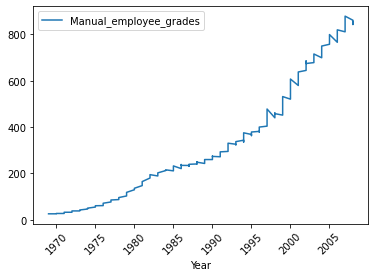

In [29]:
df.plot(x='Year', y='Manual_employee_grades', rot=45)

In [30]:
corr = df.corr()
corr

,Year,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Foremen_and_supervisors,Clerical_and_Operatives
Year,1.000000,0.961482,0.964398,0.964391,0.957334,0.967050,0.969354,0.966753,0.962872
Manual_employee_grades,0.961482,1.000000,0.998882,0.997695,0.999101,0.998699,0.997132,0.999063,0.999973
Skilled_operatives,0.964398,0.998882,1.000000,0.996499,0.996776,0.997272,0.996317,0.998642,0.999067
Apprentices,0.964391,0.997695,0.996499,1.000000,0.996069,0.996689,0.995678,0.997057,0.997683
Semi_skilled_adults,0.957334,0.999101,0.996776,0.996069,1.000000,0.997273,0.994944,0.997173,0.998943
Clerical_employees_female,0.967050,0.998699,0.997272,0.996689,0.997273,1.000000,0.998464,0.999029,0.998816
Clerical_employees_male,0.969354,0.997132,0.996317,0.995678,0.994944,0.998464,1.000000,0.998541,0.997405
Foremen_and_supervisors,0.966753,0.999063,0.998642,0.997057,0.997173,0.999029,0.998541,1.000000,0.999210
Clerical_and_Operatives,0.962872,0.999973,0.999067,0.997683,0.998943,0.998816,0.997405,0.999210,1.000000


In [31]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

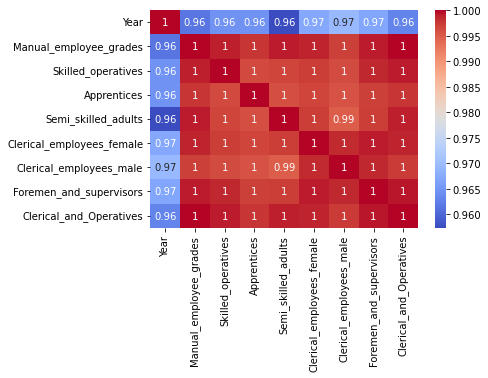

In [32]:
sns.heatmap(corr, annot=True, cmap='coolwarm');

<AxesSubplot:title={'center':'Manual_employee_grades Distribution'}>

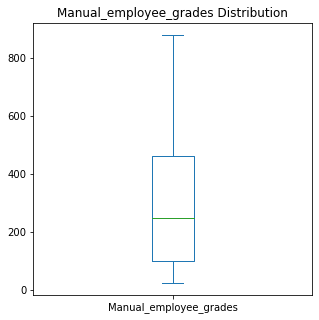

In [33]:
df['Manual_employee_grades'].plot(kind='box', title='Manual_employee_grades Distribution', figsize=(5,5))

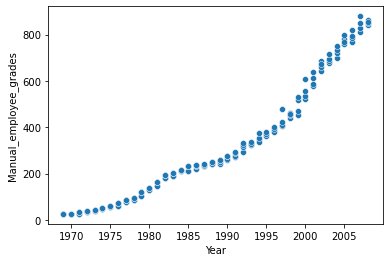

In [34]:
sns.scatterplot(x='Year', y='Manual_employee_grades', data=df)
plt.show()

In [37]:
df.head(20)

,Year,Quarter,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Foremen_and_supervisors,Clerical_and_Operatives
0,1969,Q1,26.00,25.24,12.63,21.34,14.01,22.33,35.40,25.56
1,1969,Q2,26.00,27.59,12.63,23.41,14.01,22.33,35.40,25.56
2,1969,Q3,26.00,30.77,12.63,24.71,14.01,22.33,35.40,25.56
3,1969,Q4,26.00,29.48,12.63,23.20,14.01,22.33,35.40,25.56
4,1970,Q1,26.00,29.97,12.63,24.19,14.01,22.33,35.40,25.56
5,1970,Q2,26.00,30.74,12.63,25.39,14.01,22.33,35.40,25.56
6,1970,Q3,27.50,31.90,12.60,26.55,15.30,25.32,36.39,27.05
7,1970,Q4,27.50,32.42,12.60,26.13,15.30,25.32,36.39,27.05
8,1971,Q1,27.50,36.45,12.60,30.47,15.30,25.32,36.39,27.05
9,1971,Q2,27.50,36.28,12.60,30.30,15.30,25.32,36.39,27.05


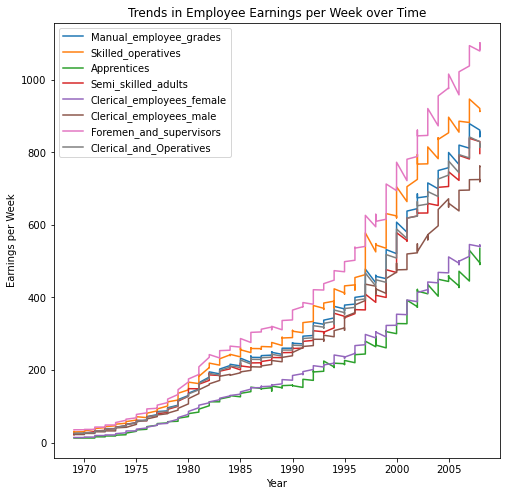

In [55]:
df.plot(x='Year', y=['Manual_employee_grades', 'Skilled_operatives', 'Apprentices', 'Semi_skilled_adults', 'Clerical_employees_female', 'Clerical_employees_male', 'Foremen_and_supervisors', 'Clerical_and_Operatives'],figsize=(8,8))
plt.xlabel('Year')
plt.ylabel('Earnings per Week')
plt.title('Trends in Employee Earnings per Week over Time')
plt.show()


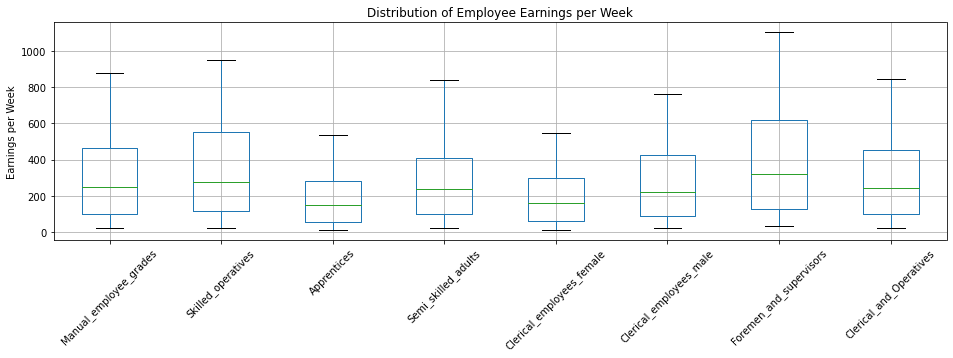

In [64]:
df.boxplot(column=['Manual_employee_grades', 'Skilled_operatives', 'Apprentices', 'Semi_skilled_adults', 'Clerical_employees_female', 'Clerical_employees_male', 'Foremen_and_supervisors', 'Clerical_and_Operatives'], figsize=(16,4), rot=45)
plt.ylabel('Earnings per Week')
plt.title('Distribution of Employee Earnings per Week')
plt.show()

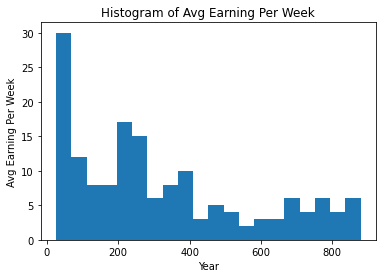

In [72]:
plt.hist(df['Manual_employee_grades'], bins=20)
plt.xlabel('Year')
plt.ylabel('Avg Earning Per Week')
plt.title('Histogram of Avg Earning Per Week')
plt.show()

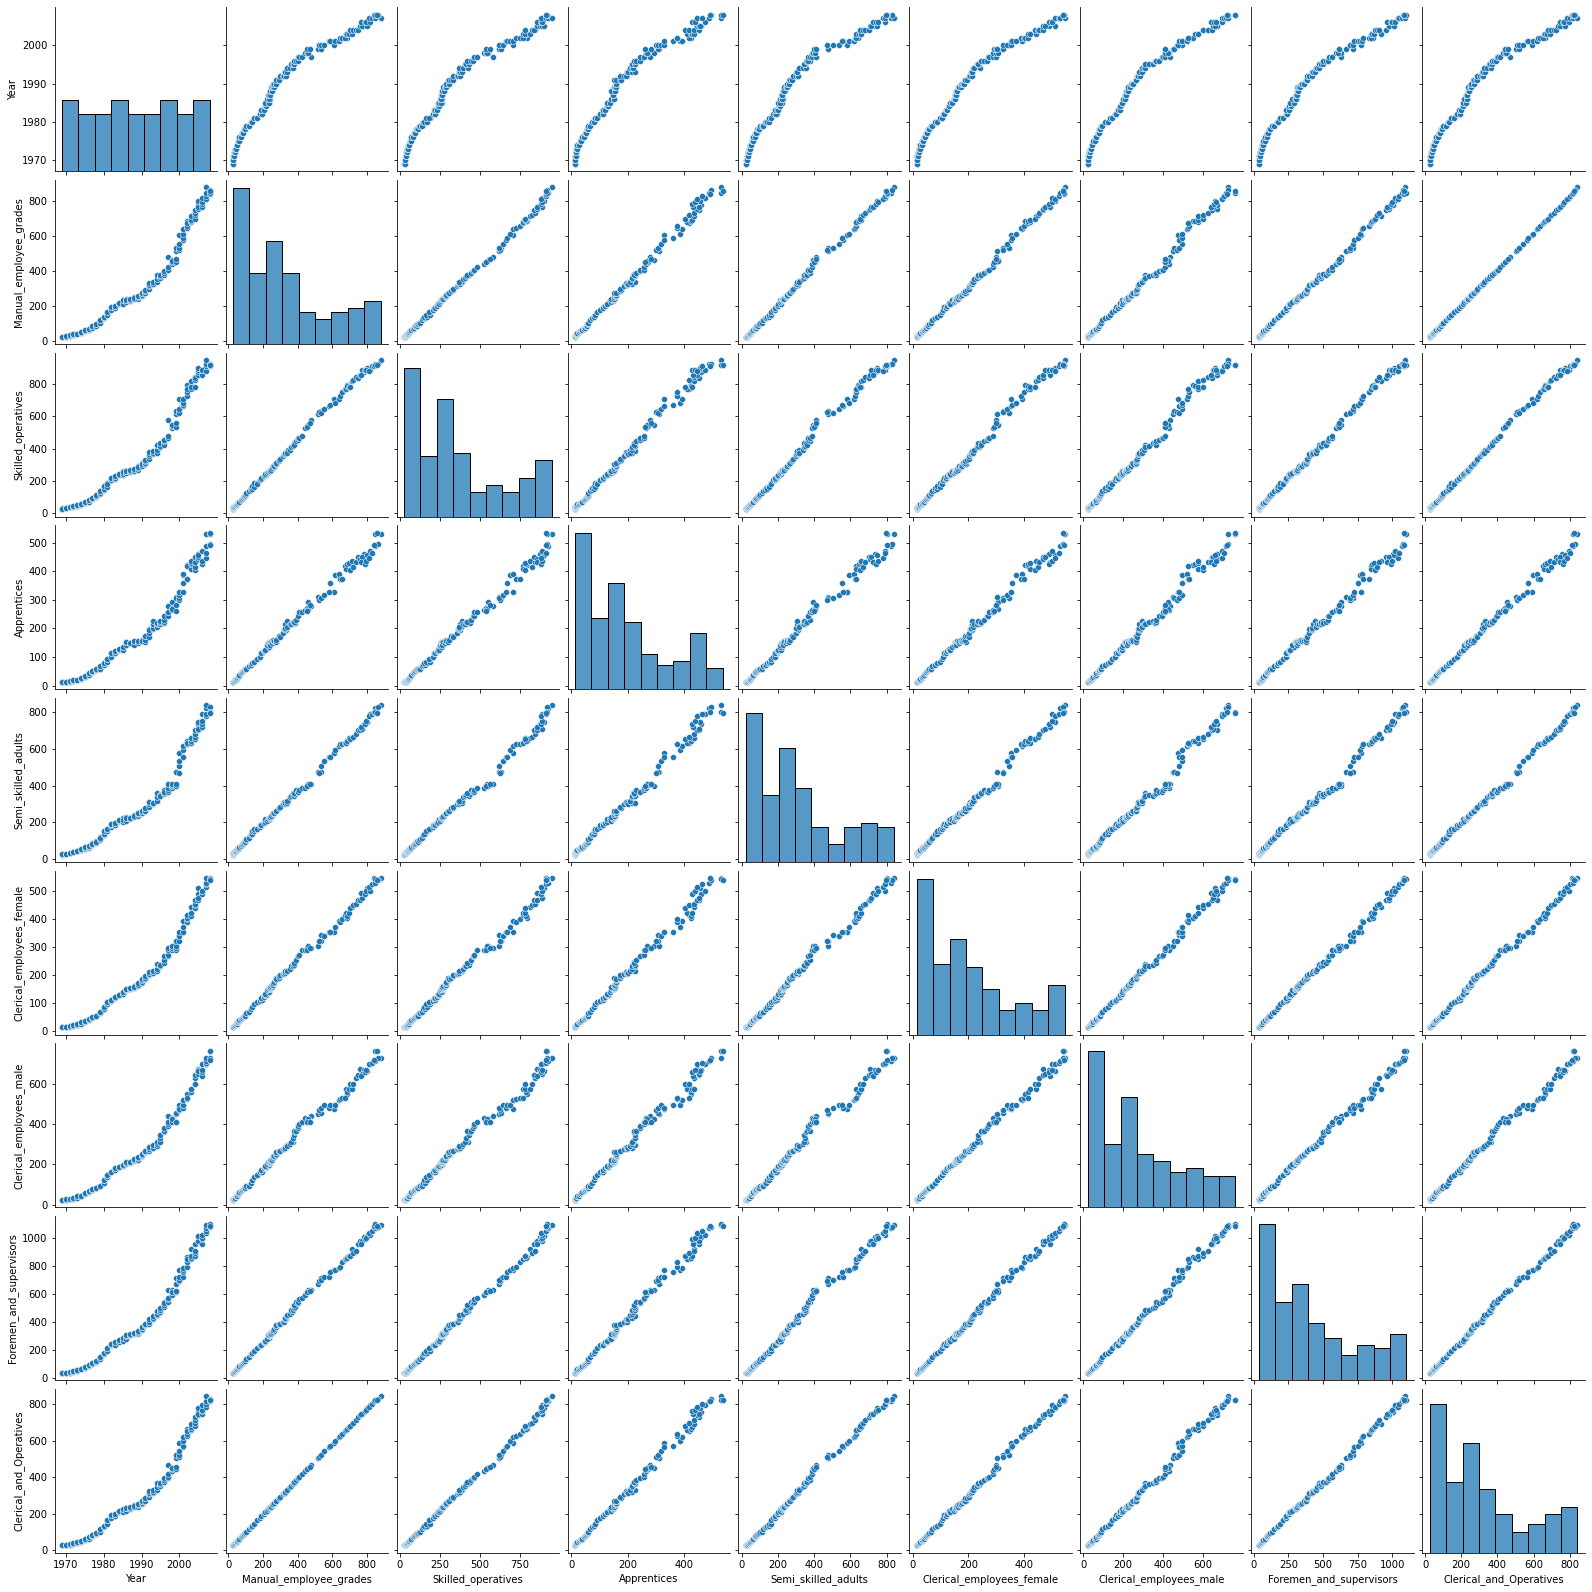

In [70]:
sns.pairplot(df)
plt.show()